In [1]:
import os
import struct
import numpy
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

/home/smith/miniconda3/envs/dml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def read(fname_img = '../src/data/mnist/train-images.idx3-ubyte', fname_lbl = '../src/data/mnist/train-labels.idx1-ubyte'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = numpy.fromfile(flbl, dtype=numpy.int8)
        if len(lbl) != num:
            print('Header mismatch. #labels != header number')

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = numpy.fromfile(fimg, dtype=numpy.uint8).reshape(num, rows, cols)

    return (img, lbl)

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
x_train, y_train = read()
dir_ = '../src/data/mnist/'
x_val, y_val = read(dir_+'t10k-images.idx3-ubyte', dir_+'t10k-labels.idx1-ubyte')


input_size = 28*28
output_size = 10

x_train = x_train.reshape(x_train.shape[0], input_size)
x_val = x_val.reshape(x_val.shape[0], input_size)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, output_size)
y_val = keras.utils.to_categorical(y_val, output_size)

# create model: à la 2NN
model = Sequential()
model.add(Dense(200, input_dim=input_size, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(output_size, activation='softmax'))

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

# Fit the model
history1 = model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(x_val, y_val))

x_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.3827 - acc: 0.8938 - val_loss: 0.2083 - val_acc: 0.9384
Epoch 2/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1818 - acc: 0.9478 - val_loss: 0.1491 - val_acc: 0.9547
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1322 - acc: 0.9616 - val_loss: 0.1166 - val_acc: 0.9639
Epoch 4/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1046 - acc: 0.9698 - val_loss: 0.0968 - val_acc: 0.9694
Epoch 5/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0852 - acc: 0.9752 - val_loss: 0.0893 - val_acc: 0.9712
Epoch 6/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.0722 - acc: 0.9784 - val_loss: 0.0803 - val_acc: 0.9755
Epoch 7/10
60000/60000 [=========================

## summarize history for accuracy

In [5]:
logged_vals = history1.history

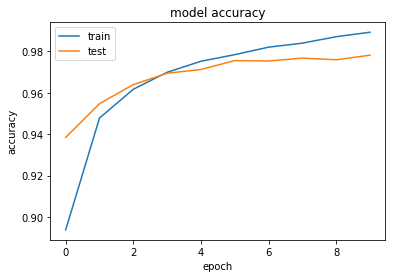

In [6]:
plt.plot(logged_vals['acc'])
plt.plot(logged_vals['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
max(logged_vals['val_acc'])

0.9780999959111214

## summarize history for loss

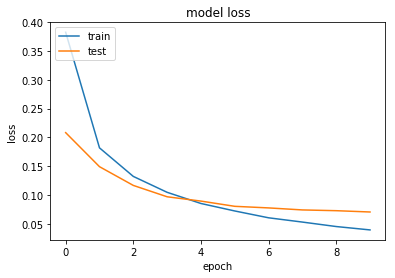

In [8]:
plt.plot(logged_vals['loss'])
plt.plot(logged_vals['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save history log

In [9]:
def log_centralised(loss_log, metric_log):
    with open('centralised_learning.csv', 'w') as file:
        for i, (loss, metric) in enumerate(zip(loss_log, metric_log)):
            file.write("{},{},{}".format(i+1, loss, metric))
            file.write('\n')

In [10]:
log_centralised(logged_vals['val_loss'], logged_vals['val_acc'])

# Plot file

In [11]:
import csv

def read_log(file_name):
    epochs = []
    losses = []
    metrics = []

    with open(file_name) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            epoch  = float(row[0])
            loss   = float(row[1])
            metric = float(row[2])
            epochs.append(epoch)
            losses.append(loss)
            metrics.append(metric)
            
    return (epochs, losses, metrics)

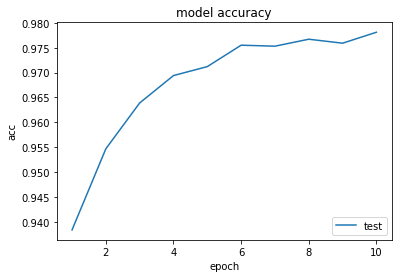

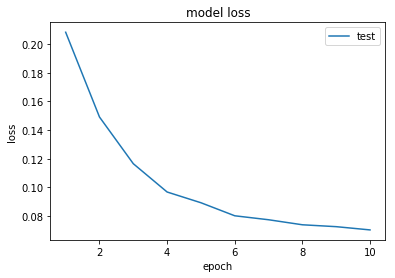

In [12]:
(epoch, loss, acc) = read_log('centralised_learning.csv')

plt.plot(epoch, acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower right')
plt.show()

plt.plot(epoch, loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()

# Less data

In [13]:
import random

def choose_random_subset_of_ids(length, subset_size):
    ids = list(range(length))
    random.shuffle(ids)
    return ids[:subset_size]

In [14]:
import glob

def get_random_subset_mnist():
    reg_exp_file = '../src/data/mnist/car*-labels.byte'
    input_files = glob.glob(reg_exp_file)
    num_cars = len(input_files)

    car_labels_str = '../src/data/mnist/car{}-labels.byte'
    car_images_str = '../src/data/mnist/car{}-images.byte'

    x_return = []
    y_return = []

    for idx in range(1, num_cars+1):
        # Read file
        image_file = car_images_str.format(idx)
        label_file = car_labels_str.format(idx)
        x, y = read(image_file, label_file)

        # Choose random subset
        portion = 0.1
        num_samples_from_car = round(y.shape[0] * portion)

        mask = choose_random_subset_of_ids(y.shape[0], num_samples_from_car)
        x_chosen = x[mask]
        y_chosen = y[mask]

        # accumulate/store chosen
        x_return.append(x_chosen)
        y_return.append(y_chosen)

    # return
    return (numpy.concatenate(x_return), numpy.concatenate(y_return))

In [15]:
x_train, y_train = get_random_subset_mnist()
dir_ = '../src/data/mnist/'
x_val, y_val = read(dir_+'t10k-images.idx3-ubyte', dir_+'t10k-labels.idx1-ubyte')


input_size = 28*28
output_size = 10

x_train = x_train.reshape(x_train.shape[0], input_size)
x_val = x_val.reshape(x_val.shape[0], input_size)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, output_size)
y_val = keras.utils.to_categorical(y_val, output_size)

# create model
model = Sequential()
model.add(Dense(200, input_dim=input_size, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(output_size, activation='softmax'))

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

# Fit the model
history2 = model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1, validation_data=(x_val, y_val))

x_train shape: (6000, 784)
6000 train samples
10000 test samples
Train on 6000 samples, validate on 10000 samples
Epoch 1/10
6000/6000 [==============================] - 1s 239us/step - loss: 1.1788 - acc: 0.7053 - val_loss: 0.5547 - val_acc: 0.8464
Epoch 2/10
6000/6000 [==============================] - 1s 241us/step - loss: 0.4437 - acc: 0.8802 - val_loss: 0.3784 - val_acc: 0.8957
Epoch 3/10
6000/6000 [==============================] - 1s 243us/step - loss: 0.3416 - acc: 0.9030 - val_loss: 0.3351 - val_acc: 0.9062
Epoch 4/10
6000/6000 [==============================] - 2s 253us/step - loss: 0.2908 - acc: 0.9157 - val_loss: 0.3098 - val_acc: 0.9128
Epoch 5/10
6000/6000 [==============================] - 2s 268us/step - loss: 0.2559 - acc: 0.9262 - val_loss: 0.2911 - val_acc: 0.9169
Epoch 6/10
6000/6000 [==============================] - 2s 266us/step - loss: 0.2269 - acc: 0.9372 - val_loss: 0.2916 - val_acc: 0.9132
Epoch 7/10
6000/6000 [==============================] - 2s 254us/step 